In [15]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/dkw9113/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm', 'colors', 'jet']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Short intro
This document is mostly devoted to testing two different interesting parameters of inhomogeneous nuclear baths. In particular we shall consider the entangled pair of NV centers in diamond of the natural concentration of $^{13}$C atoms, i.e. 1.1%.

For the results to be clearly interpretable, tests will be conducted under conditions where isotropic approximation of hyperfine interaction holds, as well as, the dipolar interaction between NV centers is negligible and these are:

* Parallel NV center quantization axes
* Constant magnetic field: $B_0~=~3000$ G
* Magnetic field gradient (as described in the report about pure-dephasing approximation for the following problem of entangled NVs.


First test will check what is the effective size of nuclear bath around each NV center and also how does it change under magnetic field gradient. Second test will help to assess the radius around NV center to be deprived of nuclei, if one wants to see decoherence envelope (CCE-2) independent on the seed of random locations of the nuclei in the bath


## Size of effective nuclear bath
Values on legend represent the radius around each NV center that is included as the effective nuclear bath size (in nm). Next tests are conducted for different NV center distances BUT ONLY INSIDE A MAGNETIC FIELD GRADIENT.
### CONSTANT MAGNETIC FIELD: $\frac{\partial B_z}{\partial x}=0$, NV-NV distance: 20 nm

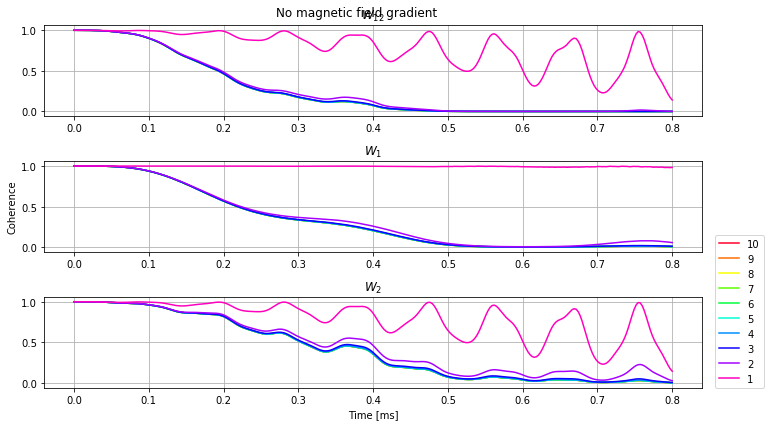

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib
#import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (10, 6)
files=['1','2','3','4','5','6','7','8','9','10']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_Rconv"

values = range(len(files))

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('gist_rainbow') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
#sns.color_palette()
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+nograd)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],a[:,1],
                       color=colorVal,
                       label=file)
    ax2.plot(1e-6*a[:,0],a[:,2],
                       color=colorVal,
                       label=file)
    ax3.plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=file)
handles,labels = ax1.get_legend_handles_labels()
ax3.legend(handles, labels, loc=(1.02,0))
ax1.grid()
ax2.grid()
ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
plt.suptitle("No magnetic field gradient")
ax1.set_title(r"$W_{12}$")
ax2.set_title(r"$W_1$")
ax3.set_title(r"$W_2$")
ax2.set_ylabel("Coherence")
ax3.set_xlabel("Time [ms]")
ax1.set_ylim([-0.06,1.06])
ax2.set_ylim([-0.06,1.06])
ax3.set_ylim([-0.06,1.06])
plt.tight_layout()
plt.show()

(0, 9)


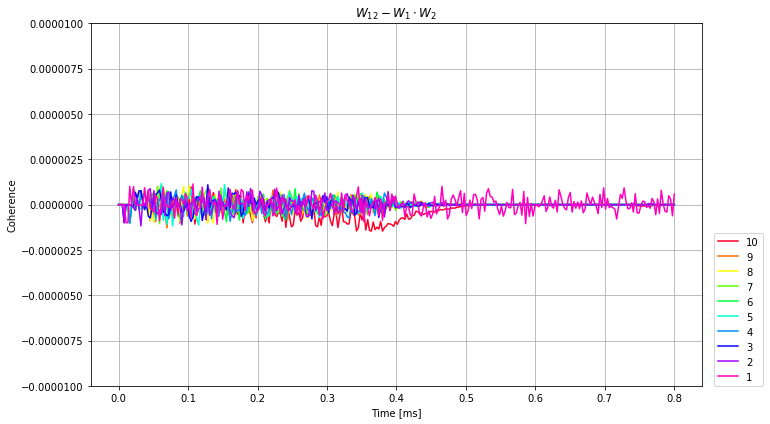

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib

files=['1','2','3','4','5','6','7','8','9','10']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('gist_rainbow') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+nograd)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]-np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
ax1.set_ylim([-1e-5,1e-5])
plt.tight_layout()
matplotlib.rcParams['figure.figsize'] = (200, 100)
plt.show()

(0, 8)


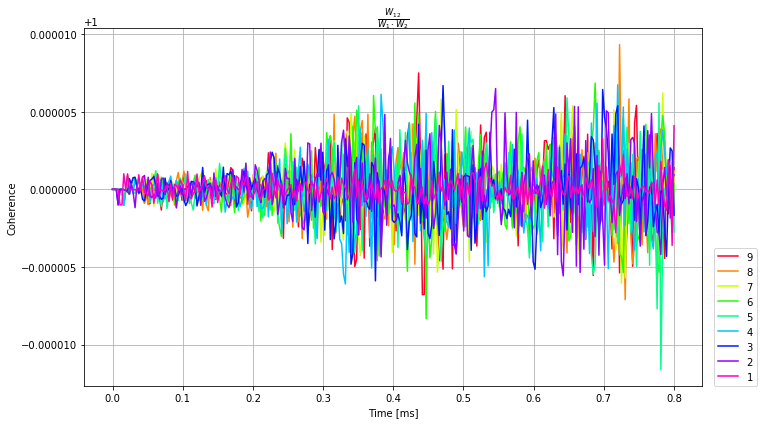

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['1','2','3','4','5','6','7','8','9']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('gist_rainbow') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+nograd)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]/np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$\frac{W_{12}}{W_{1}\cdot W_{2}}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
#ax1.set_ylim([-1e-5,1e-5])
plt.tight_layout()
plt.show()

### MAGNETIC FIELD GRADIENT: $\frac{\partial B_z}{\partial x}\neq0$ NV-NV distance: 20 nm

(0, 6)


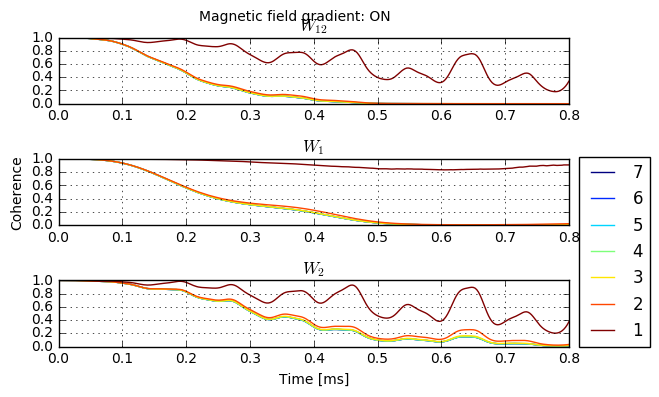

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#files=['9','10','11','12','13','14','15']#,'full']
files=['1','2','3','4','5','6','7']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_20_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],a[:,1],
                       color=colorVal,
                       label=file)
    ax2.plot(1e-6*a[:,0],a[:,2],
                       color=colorVal,
                       label=file)
    ax3.plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=file)
handles,labels = ax1.get_legend_handles_labels()
ax3.legend(handles, labels, loc=(1.02,0))
ax1.grid()
ax2.grid()
ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
plt.suptitle("Magnetic field gradient: ON")
ax1.set_title(r"$W_{12}$")
ax2.set_title(r"$W_1$")
ax3.set_title(r"$W_2$")
ax2.set_ylabel("Coherence")
ax3.set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()

(0, 6)


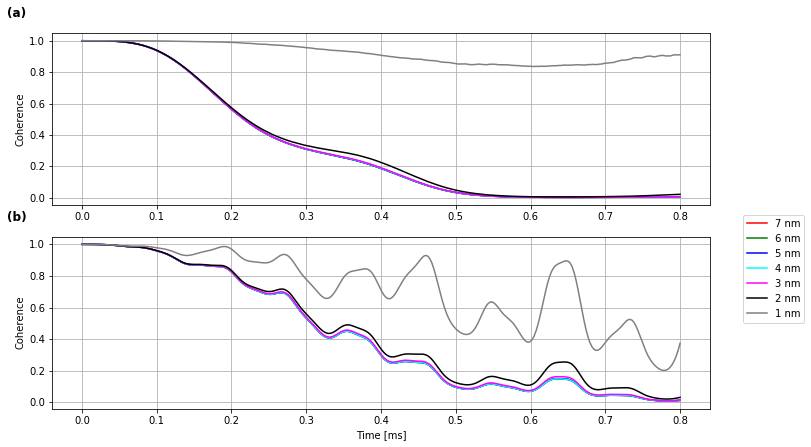

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#files=['9','10','11','12','13','14','15']#,'full']
files=['1','2','3','4','5','6','7']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_20_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('prism') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
coloren=['red','green','blue','cyan','magenta','black','gray']
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = coloren[values[idx]]
    #ax1.plot(1e-6*a[:,0],a[:,1],
    #                   color=colorVal,
    #                   label=file)
    ax1.plot(1e-6*a[:,0],a[:,2],
                       color=colorVal,
                       label=file+" nm")
    ax2.plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=file+" nm")
handles,labels = ax1.get_legend_handles_labels()
ax2.legend(handles, labels, loc=(1.05,0.5))
ax1.grid()
ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
#plt.suptitle("Magnetic field gradient: ON")
#ax1.set_title(r"$W_{1}$")
#ax2.set_title(r"$W_2$")
ax1.text(-0.1,1.15, "(a)", fontsize=12, fontweight='bold')
ax2.text(-0.1,1.15, "(b)", fontsize=12, fontweight='bold')
#ax3.set_title(r"$W_2$")
ax1.set_ylabel("Coherence")
ax2.set_ylabel("Coherence")
ax2.set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()

(0, 6)


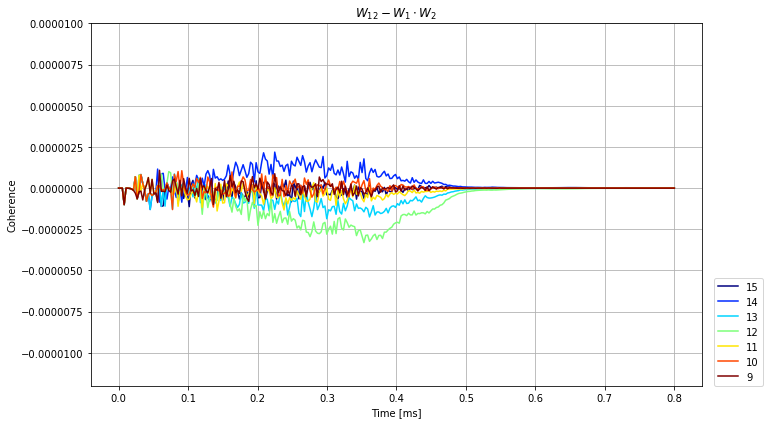

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_20_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]-np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
ax1.set_ylim([-1.2e-5,1e-5])
plt.tight_layout()
plt.show()

(0, 6)


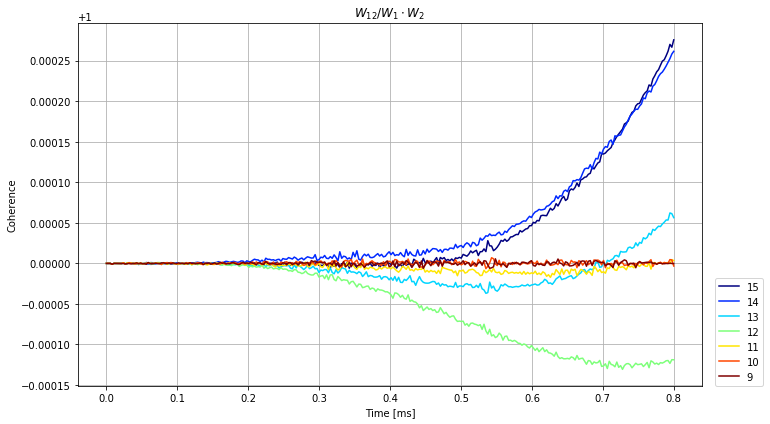

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_20_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]/np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}/W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
#ax1.set_ylim([-1.2e-5,1e-5])
plt.tight_layout()
plt.show()

### MAGNETIC FIELD GRADIENT: $\frac{\partial B_z}{\partial x}\neq0$ NV-NV distance: 10 nm

(0, 14)


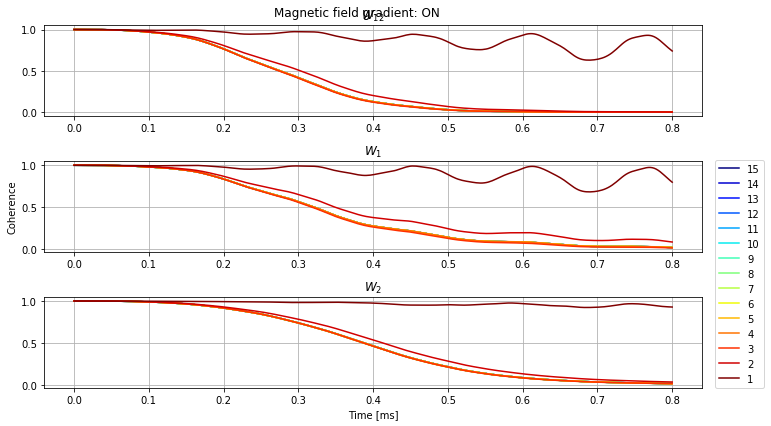

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_10_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],a[:,1],
                       color=colorVal,
                       label=file)
    ax2.plot(1e-6*a[:,0],a[:,2],
                       color=colorVal,
                       label=file)
    ax3.plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=file)
handles,labels = ax1.get_legend_handles_labels()
ax3.legend(handles, labels, loc=(1.02,0))
ax1.grid()
ax2.grid()
ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
plt.suptitle("Magnetic field gradient: ON")
ax1.set_title(r"$W_{12}$")
ax2.set_title(r"$W_1$")
ax3.set_title(r"$W_2$")
ax2.set_ylabel("Coherence")
ax3.set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()

(0, 6)


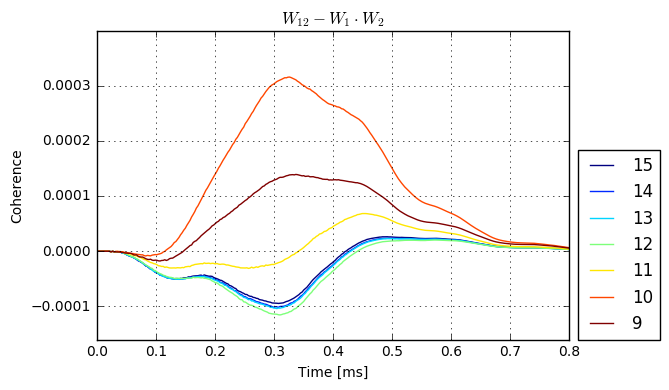

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_10_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]-np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
ax1.set_ylim([-1.6e-4,4e-4])
plt.tight_layout()
plt.show()

(0, 6)


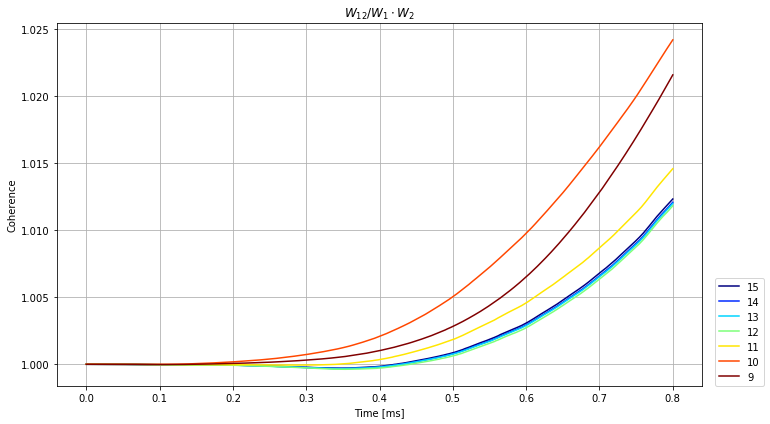

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_10_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]/np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}/W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
#ax1.set_ylim([-1.2e-5,1e-5])
plt.tight_layout()
plt.show()

### MAGNETIC FIELD GRADIENT: $\frac{\partial B_z}{\partial x}\neq0$ NV-NV distance: 5 nm

(0, 14)


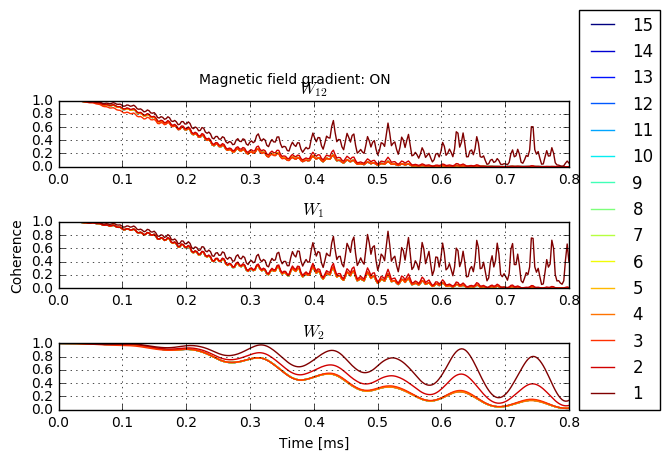

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_5_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],a[:,1],
                       color=colorVal,
                       label=file)
    ax2.plot(1e-6*a[:,0],a[:,2],
                       color=colorVal,
                       label=file)
    ax3.plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=file)
handles,labels = ax1.get_legend_handles_labels()
ax3.legend(handles, labels, loc=(1.02,0))
ax1.grid()
ax2.grid()
ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
plt.suptitle("Magnetic field gradient: ON")
ax1.set_title(r"$W_{12}$")
ax2.set_title(r"$W_1$")
ax3.set_title(r"$W_2$")
ax2.set_ylabel("Coherence")
ax3.set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()

(0, 9)


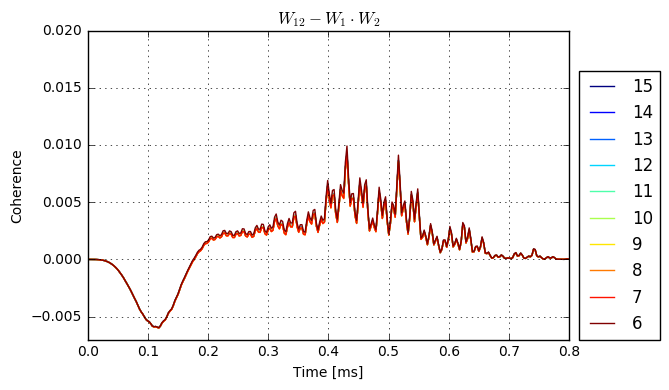

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['6','7','8','9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_5_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]-np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
ax1.set_ylim([-7e-3,2e-2])
plt.tight_layout()
plt.show()

(0, 9)


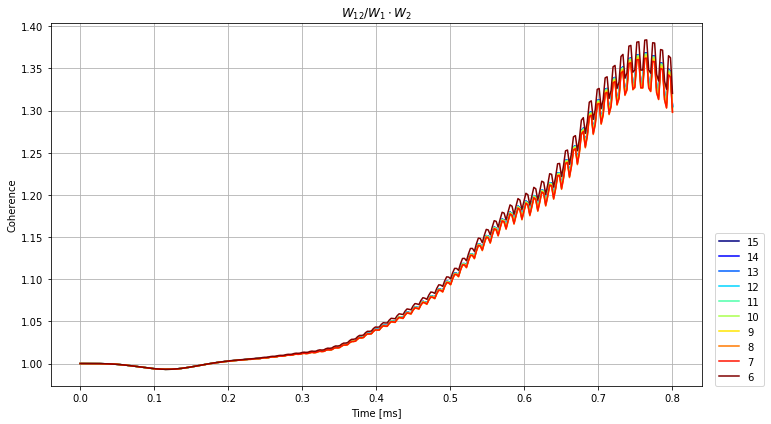

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
files=['6','7','8','9','10','11','12','13','14','15']#,'full']
files=files[::-1]
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_NV_dist_5_Rconv"

values = range(len(files))
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for idx,file in enumerate(files):
    a=np.loadtxt(start+file+grad)
    #plt.plot(a[:,0],a[:,1],label=file,color)
    colorVal = scalarMap.to_rgba(values[idx])
    ax1.plot(1e-6*a[:,0],(a[:,1]/np.multiply(a[:,2],a[:,3])),
                       color=colorVal,
                       label=file)
    
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(1.02,0))
ax1.grid()
#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
ax1.set_title(r"$W_{12}/W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
ax1.set_ylabel(r"Coherence")
ax1.set_xlabel("Time [ms]")
#ax1.set_ylim([-7e-3,2e-2])
plt.tight_layout()
plt.show()

## Testing decoherence envelope with different seed
Now, we shall test 10 different random nuclear baths and find whether there exists a described above radius around NV centers, so that decoherence envelope would not depend on the realization of the bath.

How great! Now I have to create 10 separate versions of the program for different seed

Color of a curve represents a different bath realization (or IT-speaking: seed - nr on the legend)


### CONSTANT MAGNETIC FIELD: $\frac{\partial B_z}{\partial x}=0$

(0, 9)


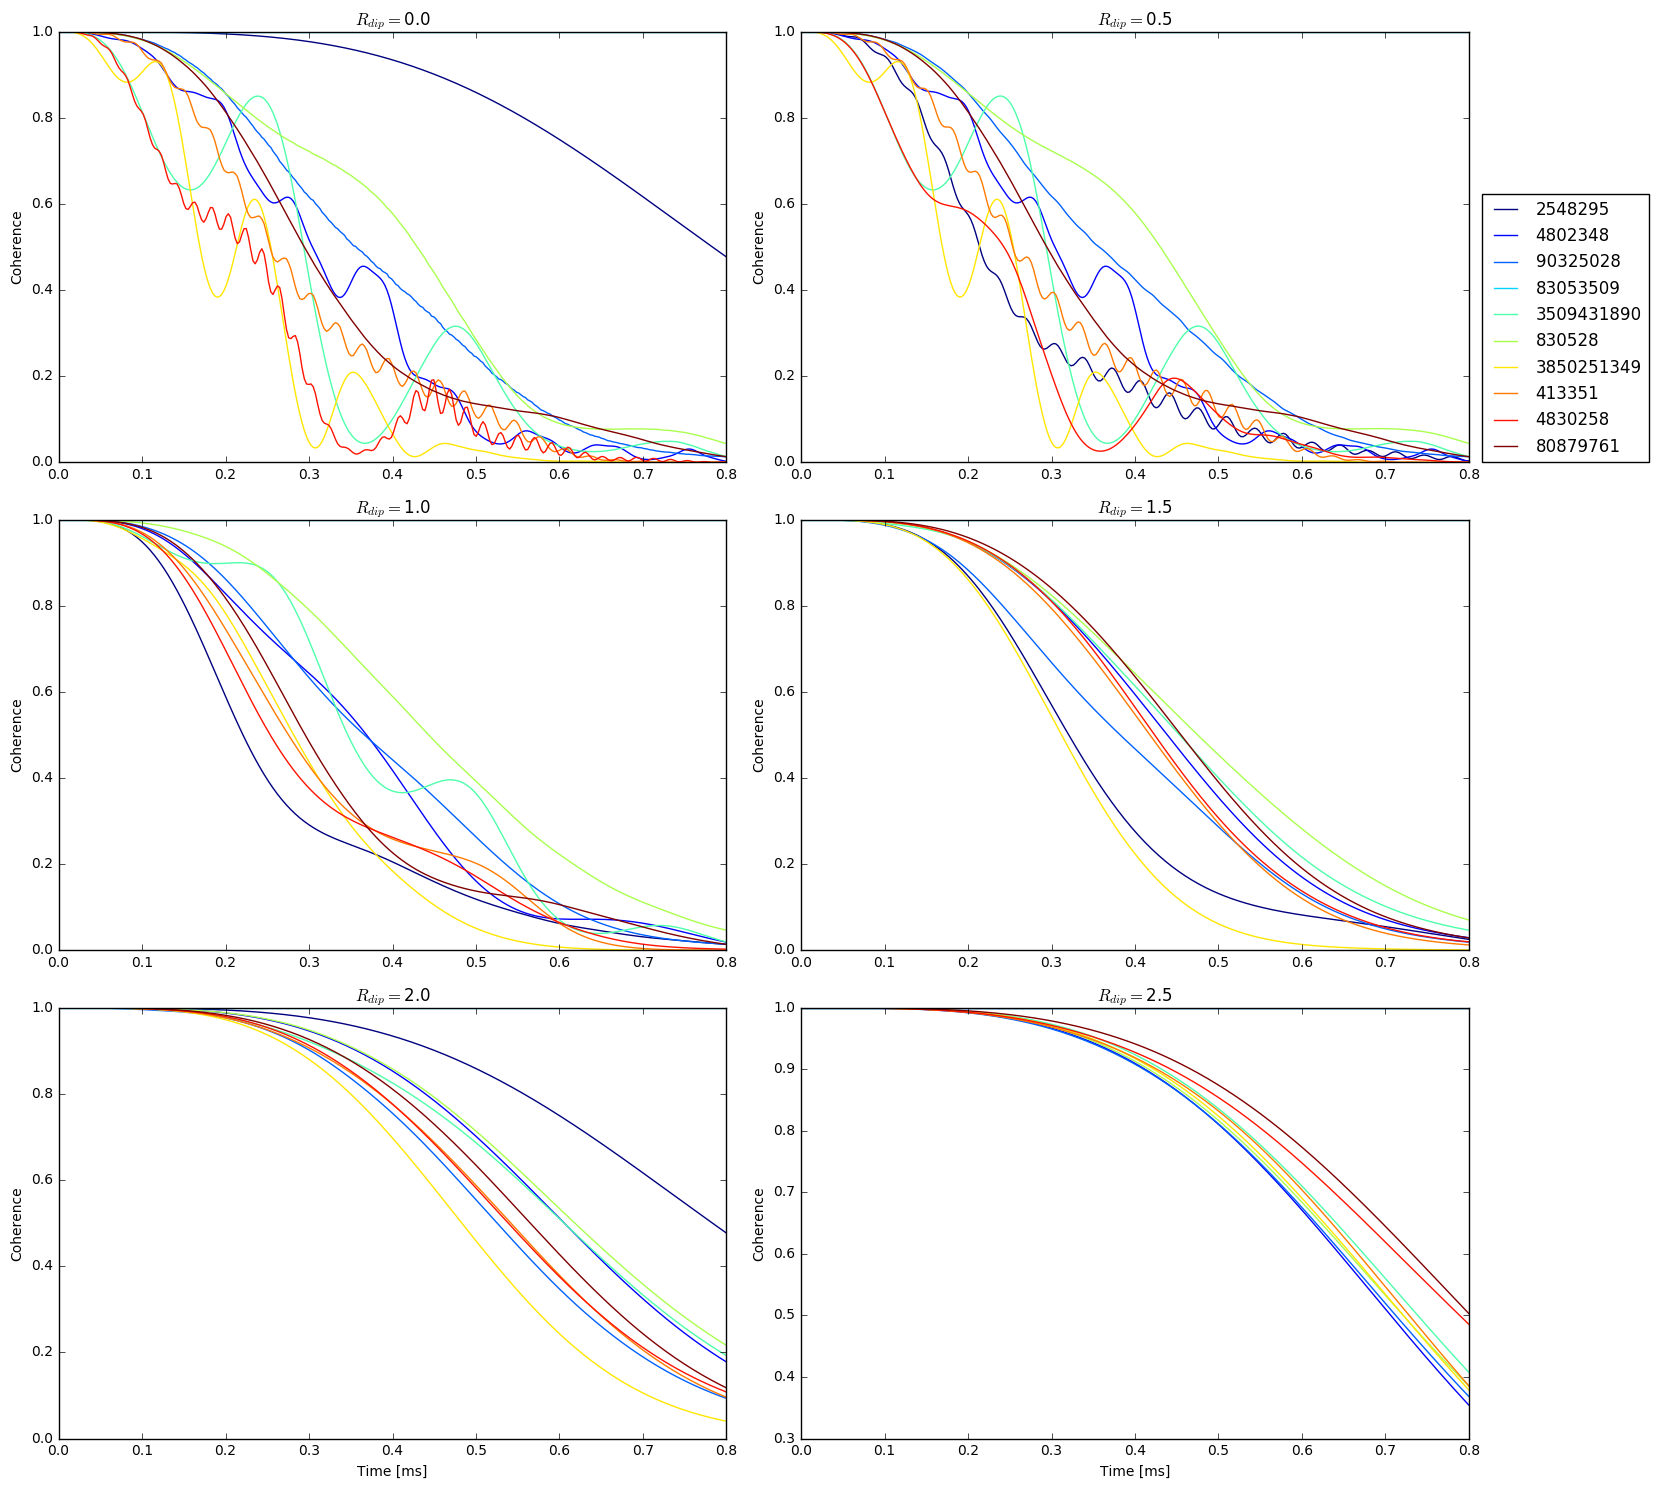

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
seeds=['2548295','4802348','90325028','83053509','3509431890','830528','3850251349','413351','4830258','80879761']
#files=files[::-1]
rdim=['00','05','10','15','20','25']
labels=['0.0','0.5','1.0','1.5','2.0','2.5']
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_seed_"
middle="_Rdim"
values = range(len(seeds))
%matplotlib inline
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()


jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for i,rd in enumerate(rdim):
    for idx,seed in enumerate(seeds):
        a=np.loadtxt(start+seed+middle+rd+nograd)
        #plt.plot(a[:,0],a[:,1],label=file,color)
        colorVal = scalarMap.to_rgba(values[idx])
        axs[i].plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=seed)
        axs[i].set_title(r"$R_{dip}=$"+labels[i])
        axs[i].set_ylabel(r"Coherence")
        axs[i].grid()
    
handles,seeds = axs[1].get_legend_handles_labels()
axs[1].legend(handles, seeds, loc=(1.02,0))

#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
#ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
#axs[.set_ylabel(r"Coherence")
axs[4].set_xlabel("Time [ms]")
axs[5].set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()

### MAGNETIC FIELD GRADIENT: $\frac{\partial B_z}{\partial x}\neq 0$

(0, 9)


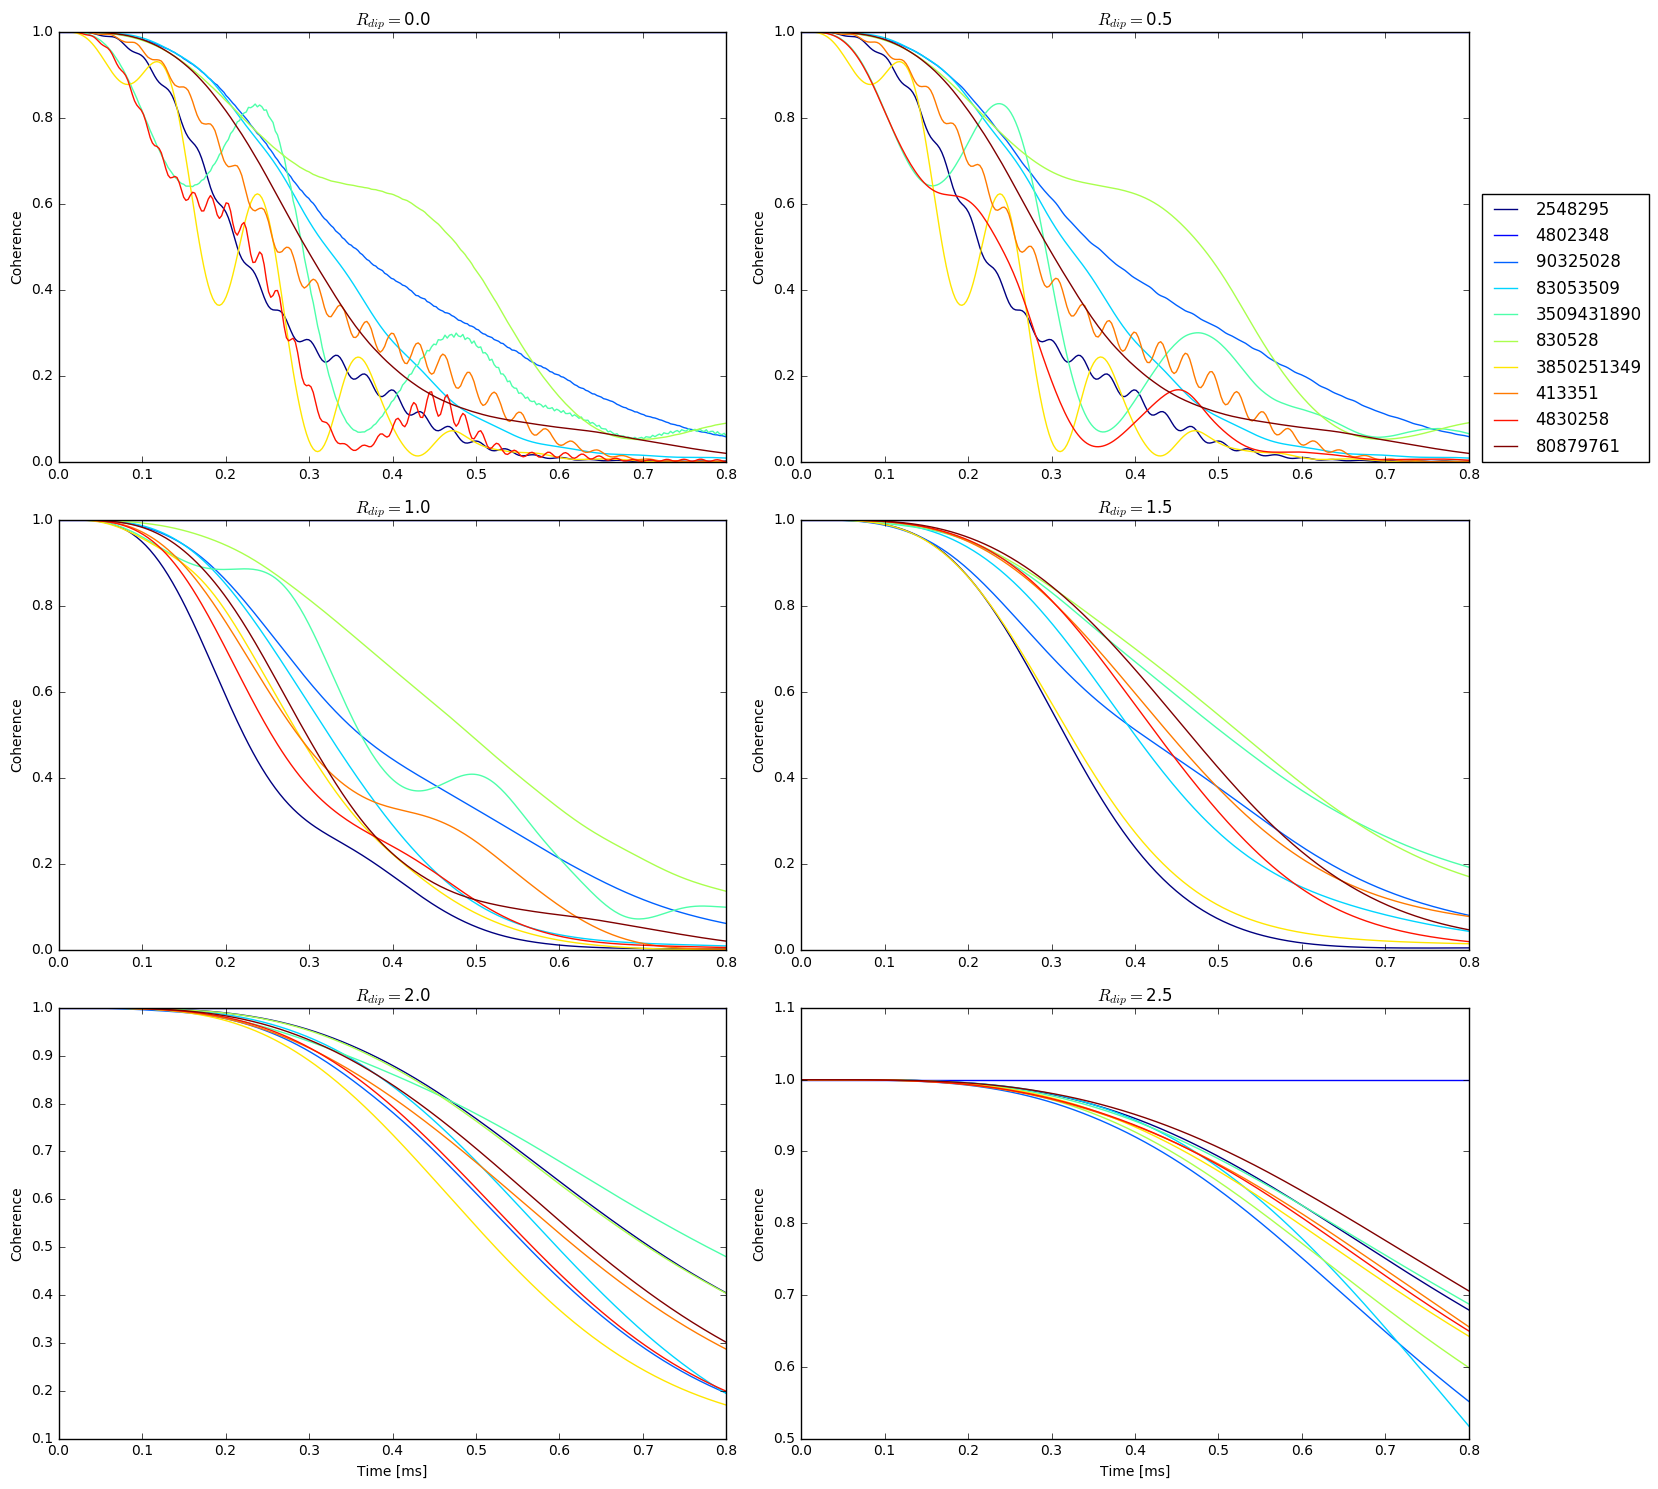

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
seeds=['2548295','4802348','90325028','83053509','3509431890','830528','3850251349','413351','4830258','80879761']
#files=files[::-1]
rdim=['00','05','10','15','20','25']
labels=['0.0','0.5','1.0','1.5','2.0','2.5']
#files=['3','4','5','6','7','8','9','10','full']
nograd="_nograd.dat"
grad="_grad.dat"
start="cce-2_seed_"
middle="_Rdim"
values = range(len(seeds))
%matplotlib inline
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)
# replace the next line 
#jet = colors.Colormap('jet')
# with
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()


jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
for i,rd in enumerate(rdim):
    for idx,seed in enumerate(seeds):
        a=np.loadtxt('./diff_seed/'+start+seed+middle+rd+grad)
        #plt.plot(a[:,0],a[:,1],label=file,color)
        colorVal = scalarMap.to_rgba(values[idx])
        axs[i].plot(1e-6*a[:,0],a[:,3],
                       color=colorVal,
                       label=seed)
        axs[i].set_title(r"$R_{dip}=$"+labels[i])
        axs[i].set_ylabel(r"Coherence")
        axs[i].grid()
    
handles,seeds = axs[1].get_legend_handles_labels()
axs[1].legend(handles, seeds, loc=(1.02,0))

#ax2.grid()
#ax3.grid()
#ax1.set_xlim([100000,300000])
#ax2.set_xlim([100000,300000])
#ax3.set_xlim([100000,300000])
#ax1.set_title(r"$W_{12}-W_{1}\cdot W_{2}$")
#ax1.set_title(r"$W_{12}$")
#ax2.set_title(r"$W_1$")
#ax3.set_title(r"$W_2$")
#axs[.set_ylabel(r"Coherence")
axs[4].set_xlabel("Time [ms]")
axs[5].set_xlabel("Time [ms]")
plt.tight_layout()
plt.show()